         Run_1  Run_2  Run_3  Run_4  Run_5  Run_6  Run_7  Run_8  Run_9  \
Gene                                                                     
DCAF7       46     29      6     52    121     73    351     11     14   
GDAP2       46     29      6     52    121     20    140     11    159   
SMU1        46     29      6     52    121     73    351     11     14   
BTBD9       46     29      6     52    121     73    351     11     14   
Chlor_1     46     29      6     52    121     20    140     11    159   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...   
ARV1       371    221    469    265    342    420    267    265    489   
Short_4    371    221    267    265    219    383    267    262    489   
Gamma-g    371    221    278    313    342    144    341    248    354   
icl-1      371    221    278    265    342    420    267    248    489   
GNPNAT1    371    221    469    265    342    420    267    265    489   

         Run_10  ...  Run_91  Run_92 

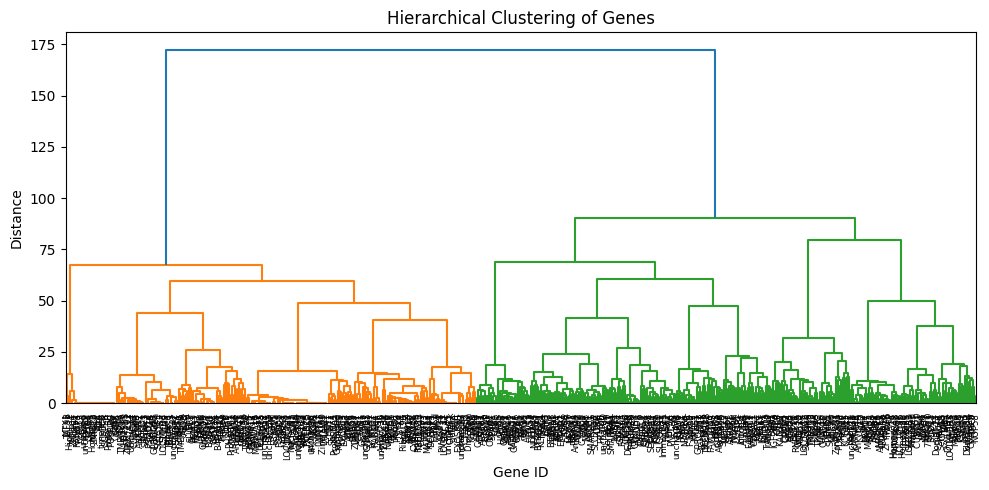

PermissionError: [Errno 13] Permission denied: '/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_clusters_hierarchical.csv'

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/SBM_100_runs_cluster.csv")
df.set_index("Gene", inplace=True)

df_encoded = pd.get_dummies(df.astype(str))
print(df)
print(df_encoded)

# Optional: scale the data (useful if block numbers have large range)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical Clustering of Genes")
plt.xlabel("Gene ID")
plt.ylabel("Distance")
plt.tight_layout()
plt.savefig("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_dendrogram.pdf", format='pdf')
plt.show()

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

clusters = fcluster(linkage_matrix, t=35, criterion='distance')  # Adjust t as needed

# Add cluster labels to dataframe
df['Cluster'] = clusters
df.to_csv("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_clusters_hierarchical.csv")
print(df['Cluster'].value_counts())

In [7]:
X_scaled

array([[-1.5266196 , -1.30989799, -1.60068901, ..., -0.81644102,
         0.90852292, -1.54313344],
       [-1.5266196 , -1.30989799, -1.60068901, ..., -0.81644102,
         0.90852292, -1.54313344],
       [-1.5266196 , -1.30989799, -1.60068901, ..., -0.81644102,
         0.90852292, -1.54313344],
       ...,
       [ 0.97959723,  0.21394381,  0.16779492, ..., -0.36234984,
         0.24646159,  0.07728406],
       [ 0.97959723,  0.21394381,  0.16779492, ..., -0.36234984,
         0.13495653,  0.07728406],
       [ 0.97959723,  0.21394381,  1.40963475, ..., -0.36234984,
         0.13495653,  0.07728406]])

Computing co-clustering frequency: 100%|██████████████████████████████████████████████| 100/100 [00:03<00:00, 28.93it/s]
/tmp/ipykernel_5455/1883366808.py:33: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(1 - co_cluster_matrix, method='ward')  # Dissimilarity = 1 - similarity


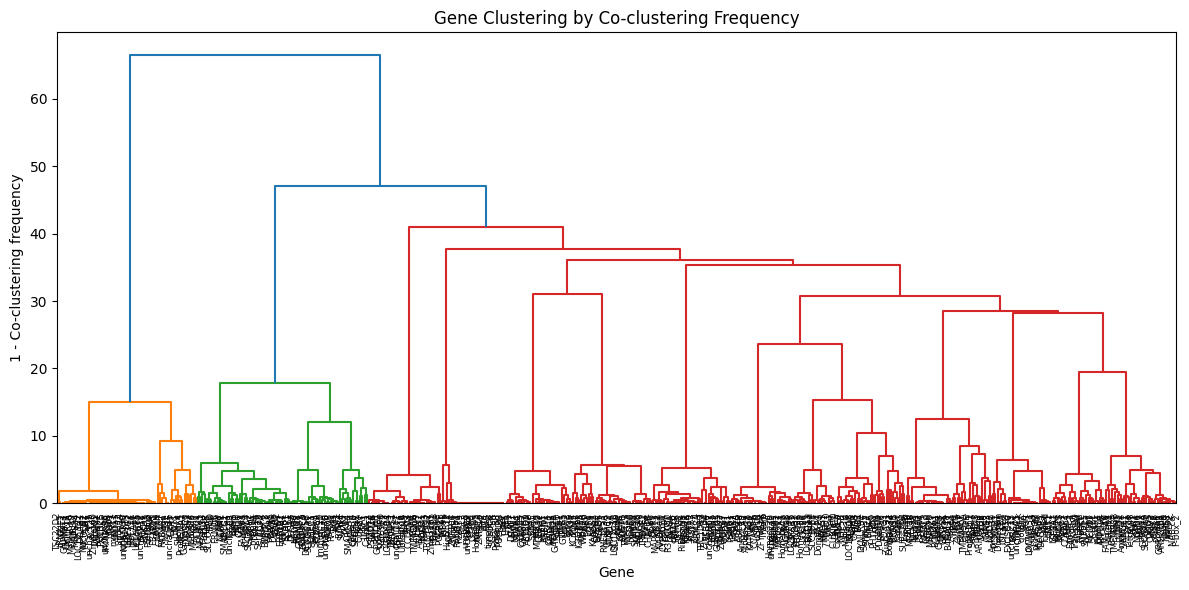

PermissionError: [Errno 13] Permission denied: '/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_clusters_by_cocluster.csv'

In [15]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from tqdm import tqdm

# Step 1: Load data
df = pd.read_csv("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/SBM_100_runs_cluster.csv")
df.set_index("Gene", inplace=True)
genes = df.index.tolist()
n_genes = len(genes)
n_runs = df.shape[1]

# Step 2: Initialize co-clustering matrix
co_cluster_matrix = np.zeros((n_genes, n_genes), dtype=float)

# Step 3: Compute co-clustering frequency
for run in tqdm(df.columns, desc="Computing co-clustering frequency"):
    labels = df[run].values
    for i in range(n_genes):
        for j in range(i + 1, n_genes):
            if labels[i] == labels[j]:
                # print(labels[i],labels[j])
                # assert False
                co_cluster_matrix[i, j] += 1
                co_cluster_matrix[j, i] += 1

# Normalize to get frequency (0 to 1)
co_cluster_matrix /= n_runs
np.fill_diagonal(co_cluster_matrix, 1.0)

# Step 4: Perform hierarchical clustering
linkage_matrix = linkage(1 - co_cluster_matrix, method='ward')  # Dissimilarity = 1 - similarity

# Step 5: Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=genes, leaf_rotation=90, leaf_font_size=6)
plt.title("Gene Clustering by Co-clustering Frequency")
plt.xlabel("Gene")
plt.ylabel("1 - Co-clustering frequency")
plt.tight_layout()
plt.savefig("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_cocluster_dendrogram.pdf", format='pdf')
plt.show()

# Step 6: Cut tree and assign clusters
clusters = fcluster(linkage_matrix, t=20, criterion='distance')  # Adjust threshold as needed

# Step 7: Add cluster labels to dataframe and save
df['Cluster'] = clusters
df.to_csv("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_clusters_by_cocluster.csv")
print(df['Cluster'].value_counts())

In [11]:
# Step 6: Cut tree and assign clusters
clusters = fcluster(linkage_matrix, t=20, criterion='distance')  # Adjust threshold as needed

# Step 7: Add cluster labels to dataframe and save
df['Cluster'] = clusters
print(df['Cluster'].value_counts())

Cluster
2     77
1     63
12    56
9     51
10    39
6     36
7     35
3     33
5     30
4     29
8     28
11    27
Name: count, dtype: int64


Computing co-clustering frequency: 100%|██████████| 100/100 [00:01<00:00, 58.16it/s]


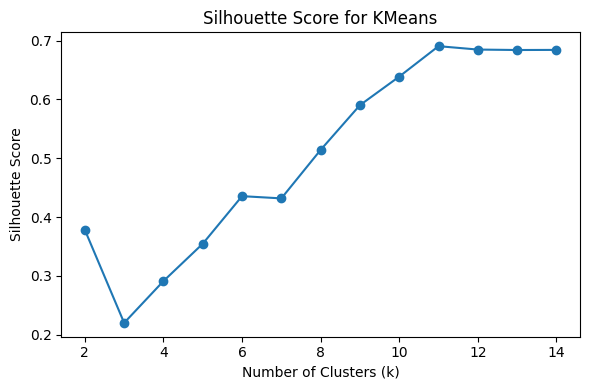

Best k = 11


PermissionError: [Errno 13] Permission denied: '/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_clusters_kmeans.csv'

In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from tqdm import tqdm

# Step 1: Load data
df = pd.read_csv("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/SBM_100_runs_cluster.csv")
df.set_index("Gene", inplace=True)
genes = df.index.tolist()
n_genes = len(genes)
n_runs = df.shape[1]

# Step 2: Initialize co-clustering matrix
co_cluster_matrix = np.zeros((n_genes, n_genes), dtype=float)

# Step 3: Compute co-clustering frequency
for run in tqdm(df.columns, desc="Computing co-clustering frequency"):
    labels = df[run].values
    for i in range(n_genes):
        for j in range(i + 1, n_genes):
            if labels[i] == labels[j]:
                # print(labels[i],labels[j])
                # assert False
                co_cluster_matrix[i, j] += 1
                co_cluster_matrix[j, i] += 1

# Normalize to get frequency (0 to 1)
co_cluster_matrix /= n_runs
np.fill_diagonal(co_cluster_matrix, 1.0)


# Step 1: Transform similarity matrix into features
# (1 - similarity) is a distance; PCA works best on features, not distances
# So we use PCA directly on the co-cluster matrix as if it's features

pca = PCA(n_components=10)  # reduce to 10 dimensions or tweak
X_pca = pca.fit_transform(co_cluster_matrix)

# Step 2: Find optimal k using silhouette score
s_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    s_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(K_range, s_scores, marker='o')
plt.title("Silhouette Score for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

# Step 3: Choose best k (e.g., max silhouette)
best_k = K_range[np.argmax(s_scores)]
print(f"Best k = {best_k}")

# Step 4: Run K-means with best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df['Cluster_kmeans'] = kmeans.fit_predict(X_pca) + 1  # cluster labels start at 0

# Step 5: Save result
df.to_csv("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_clusters_kmeans.csv")
print(df['Cluster_kmeans'].value_counts())

Computing co-clustering frequency: 100%|██████████| 100/100 [00:00<00:00, 447.39it/s]


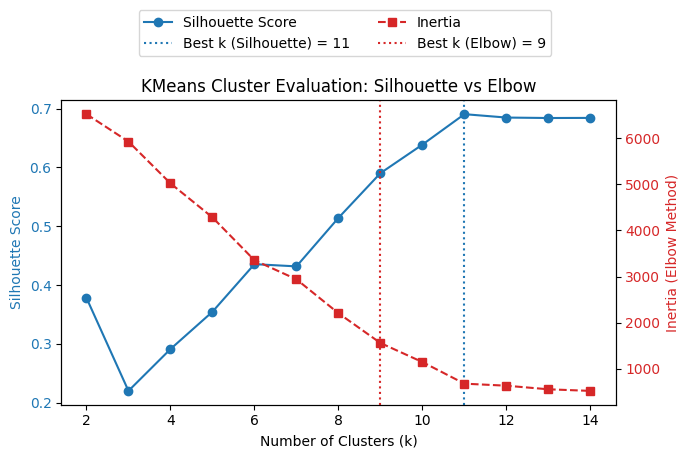

Best k (Silhouette) = 11
Best k (Elbow)      = 9


PermissionError: [Errno 13] Permission denied: '/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_clusters_kmeans.csv'

In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from kneed import KneeLocator

# =============================
# Step 1. Load and prepare data
# =============================
df = pd.read_csv(
    "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/SBM_100_runs_cluster.csv"
)
df.set_index("Gene", inplace=True)

genes = df.index.tolist()
n_genes = len(genes)
n_runs = df.shape[1]

# ========================================
# Step 2. Compute co-clustering frequency
# ========================================
co_cluster_matrix = np.zeros((n_genes, n_genes), dtype=float)

for run in tqdm(df.columns, desc="Computing co-clustering frequency"):
    labels = df[run].values
    for i in range(n_genes):
        co_cluster_matrix[i, labels == labels[i]] += 1

# Normalize to get frequency (0–1)
co_cluster_matrix /= n_runs
np.fill_diagonal(co_cluster_matrix, 1.0)

# =======================================
# Step 3. Dimensionality reduction (PCA)
# =======================================
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(co_cluster_matrix)

# =======================================
# Step 4. Evaluate optimal k (Silhouette + Elbow)
# =======================================
K_range = range(2, 15)
silhouette_scores = []
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, labels))
    inertias.append(kmeans.inertia_)

# Automatically detect elbow (knee) point
knee = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
best_k_elbow = knee.knee
best_k_silhouette = K_range[np.argmax(silhouette_scores)]

# ===========================
# Step 5. Plot both methods
# ===========================
fig, ax1 = plt.subplots(figsize=(7, 4))

# Silhouette (left axis)
color1, color2 = "tab:blue", "tab:red"
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Silhouette Score", color=color1)
ax1.plot(K_range, silhouette_scores, marker='o', color=color1, label="Silhouette Score")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.axvline(best_k_silhouette, color=color1, linestyle=':', label=f"Best k (Silhouette) = {best_k_silhouette}")

# Inertia (right axis)
ax2 = ax1.twinx()
ax2.set_ylabel("Inertia (Elbow Method)", color=color2)
ax2.plot(K_range, inertias, marker='s', linestyle='--', color=color2, label="Inertia")
ax2.tick_params(axis='y', labelcolor=color2)
if best_k_elbow is not None:
    ax2.axvline(best_k_elbow, color=color2, linestyle=':', label=f"Best k (Elbow) = {best_k_elbow}")

plt.title("KMeans Cluster Evaluation: Silhouette vs Elbow")
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
fig.tight_layout()
plt.show()

# ================================
# Step 6. Final clustering with best k (by silhouette)
# ================================
print(f"Best k (Silhouette) = {best_k_silhouette}")
print(f"Best k (Elbow)      = {best_k_elbow}")

final_k = best_k_silhouette  # or choose best_k_elbow manually if you prefer

kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init="auto")
df['Cluster_kmeans'] = kmeans_final.fit_predict(X_pca) + 1  # 1-based cluster IDs

# ================================
# Step 7. Save output
# ================================
output_path = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/19.Graph tool/gene_clusters_kmeans.csv"
df.to_csv(output_path)
print(f"\nSaved clustered data to:\n{output_path}")
print(df['Cluster_kmeans'].value_counts())

In [4]:
!pip install kneed

DEPRECATION: Loading egg at /home/saurav/miniconda3/envs/genomics_work/lib/python3.11/site-packages/ete3-3.1.3-py3.10.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
